In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML

class GameOfLife:
    def __init__(self, init_config = None, n_step = 1):
        self.state = init_config
        self.n_step = n_step
    
    def count_neighbours(self):
        neigh = np.zeros(self.state.shape)
        neigh[:-1, :] += self.state[1:, :]
        neigh[1:, :] += self.state[:-1, :]
        neigh[:, :-1] += self.state[:, 1:]
        neigh[:, 1:] += self.state[:, :-1]
        neigh[:-1, :-1] += self.state[1:, 1:]
        neigh[:-1, 1:] += self.state[1:, :-1]
        neigh[1:, :-1] += self.state[:-1, 1:]
        neigh[1:, 1:] += self.state[:-1, :-1]
        return neigh
    
    def step(self):
        new_state = np.zeros(self.state.shape, int)
        neigh = self.count_neighbours()
        new_state[np.logical_and(self.state == 1, np.logical_and(2 <= neigh, neigh <= 3))] = 1
        new_state[np.logical_and(self.state == 0, neigh == 3)] = 1
        self.state = new_state
        return new_state
    
    def evolution(self):
        game = np.zeros(tuple([self.n_step+1, self.state.shape[0], self.state.shape[1]]), dtype = int)
        game[0] = self.state
        for s in range(self.n_step):
            game[s+1] = self.step()
        return game

Text(0.5, 1.0, 'Initial configuration')

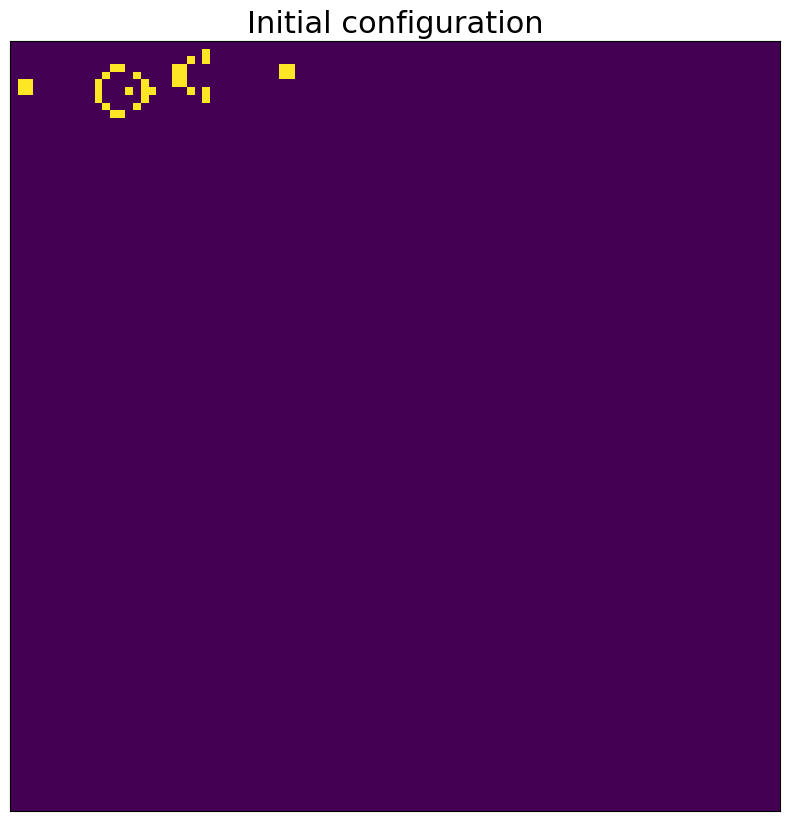

In [33]:
N = 100
#Glider
#init_conf = np.zeros((N, N), int)
#init_conf[1, 2] = init_conf[2, 3] = init_conf[3, 3] = init_conf[3, 2] = init_conf[3, 1] = 1

# Gosper's glider gun
init_conf = np.zeros((N, N), int)
init_conf[5, 1] = init_conf[5, 2] = init_conf[6, 1] = init_conf[6, 2] = 1
init_conf[3, 35] = init_conf[3, 36] = init_conf[4, 35] = init_conf[4, 36] = 1
init_conf[5, 11] = init_conf[6, 11] = init_conf[7, 11] = init_conf[8, 12] = init_conf[4, 12] = init_conf[3, 13] = init_conf[3, 14] = init_conf[9, 13] = init_conf[9, 14] = 1
init_conf[6, 15] = init_conf[4, 16] = init_conf[8, 16] = init_conf[5, 17] = init_conf[6, 17] = init_conf[7, 17] = init_conf[6, 18] = 1
init_conf[3, 21] = init_conf[4, 21] = init_conf[5, 21] = init_conf[3, 22] = init_conf[4, 22] = init_conf[5, 22] = 1
init_conf[2, 23] = init_conf[2, 25] = init_conf[1, 25] = init_conf[6, 23] = init_conf[6, 25] = init_conf[7, 25] = 1

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1,1,1)

ax.imshow(init_conf)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Initial configuration", fontsize = 22)

In [39]:
nstep = 500
g = GameOfLife(init_conf, nstep)
evol = g.evolution()

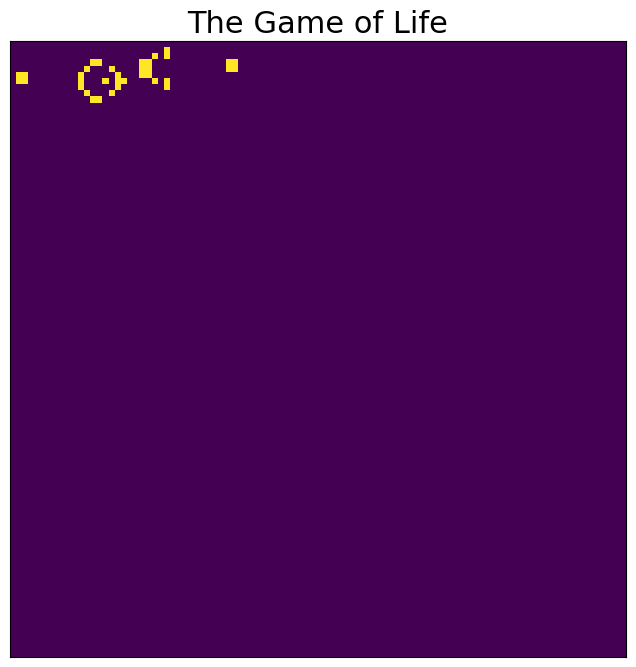

In [40]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1,1,1)

im = ax.imshow(evol[0])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("The Game of Life", fontsize = 22)

def update(frame):
    im.set_data(evol[frame])
    return tuple([im])

ani = anim.FuncAnimation(fig = fig, func=update, frames=nstep, interval=50)
HTML(ani.to_jshtml())